# Importing the Dependencies


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics



# Data Collection and Processing 

In [2]:
# Loading the data from csv file to pandas dataFrame
car_dataset=pd.read_csv("car data.csv")


In [3]:
# inspecting the first five rows of dataFrame
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#Checking the number of row and column
car_dataset.shape

(301, 9)

In [5]:
#Getting the imformation about the dataSet
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# Checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
#Checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


# Encoding the categorical data

In [9]:
#Encoding "fuel_type" column
car_dataset.replace({"Fuel_Type":{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#Encoding "Seller_Type" column
car_dataset.replace({"Seller_Type":{'Dealer':0,'Individual':1}},inplace=True)

#Encoding "Transmission" column
car_dataset.replace({"Transmission":{'Manual':0,'Automatic':1}},inplace=True)


# Retain current downcasting behavior explicitly
car_dataset.infer_objects(copy=False)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [10]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Splitting the data and target

In [12]:
X=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_dataset['Selling_Price']

In [13]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [14]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

# Splitting Training and Test data

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

# Model Training
#### Linear Regression

In [16]:
#Loading the linear regression model
lin_reg_model=LinearRegression()

In [17]:
lin_reg_model.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Model Evaluation

In [18]:
# Prediction on Training Data
training_data_prediction=lin_reg_model.predict(X_train)

In [19]:
# R squared Error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R Squared Error : ",error_score)

R Squared Error :  0.8799451660493708


# Visualize the actual prices and predicted prices

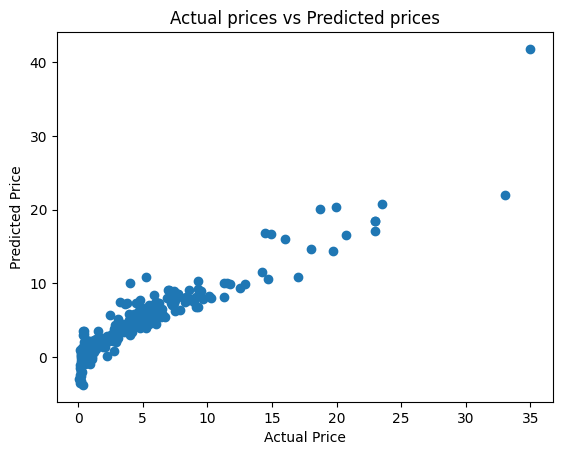

In [20]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual prices vs Predicted prices')
plt.show()

In [21]:
# Prediction on Testing Data
test_data_prediction=lin_reg_model.predict(X_test)

In [22]:
# R squared Error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R Squared Error : ",error_score)

R Squared Error :  0.8365766715026374


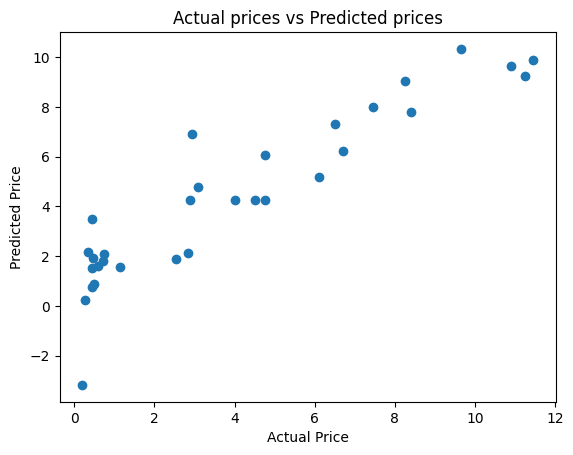

In [23]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual prices vs Predicted prices')
plt.show()

# Lasso Regression 

R Squared Error :  0.8427856123435794


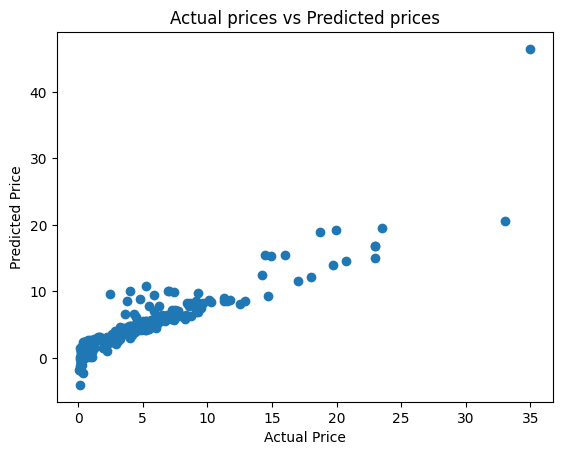

R Squared Error :  0.8709167941173195


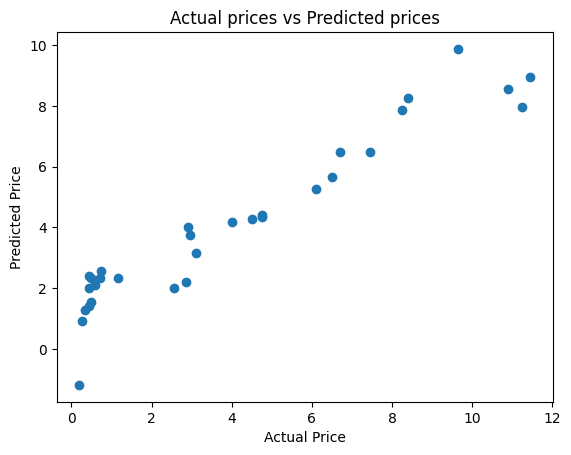

In [24]:
#Loading the lasso regression model
lasso_reg_model=Lasso()
lasso_reg_model.fit(X_train,Y_train)
# Model Evaluation
# Prediction on Training Data
training_data_prediction=lasso_reg_model.predict(X_train)
# R squared Error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R Squared Error : ",error_score)
# Visualize the actual prices and predicted prices
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual prices vs Predicted prices')
plt.show()
# Prediction on Testing Data
test_data_prediction=lasso_reg_model.predict(X_test)
# R squared Error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R Squared Error : ",error_score)
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual prices vs Predicted prices')
plt.show()